In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dt_wine=pd.read_csv("C:\\Users\\divya\\Desktop\\kentroninsights\\winequality-red.csv")

In [3]:
dt_wine.mean()

fixed acidity            8.319637
volatile acidity         0.527821
citric acid              0.270976
residual sugar           2.538806
chlorides                0.087467
free sulfur dioxide     15.874922
total sulfur dioxide    46.467792
density                  0.996747
pH                       3.311113
sulphates                0.658149
alcohol                 10.422983
quality                  5.636023
dtype: float64

In [4]:
dt_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

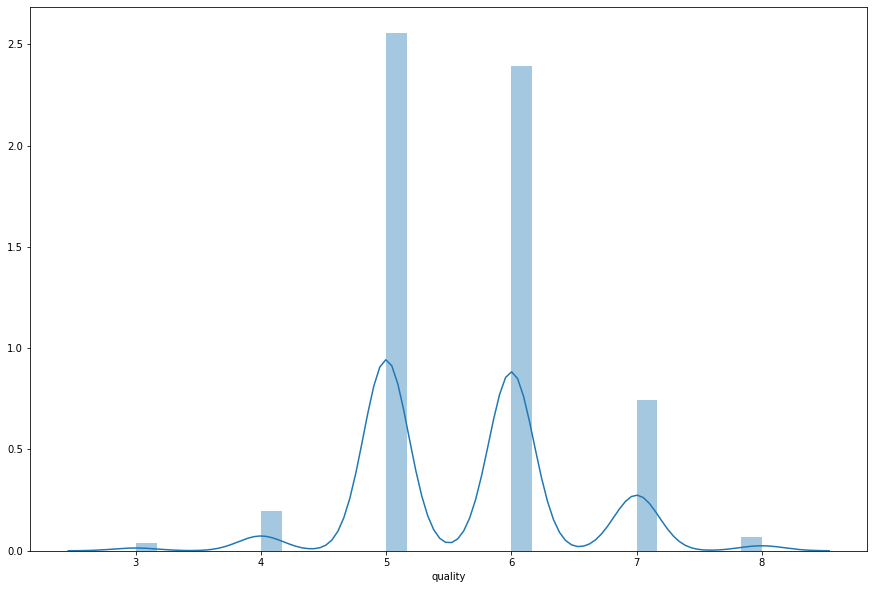

In [6]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(dt_wine['quality'])
plt.savefig("plot.png")

In [11]:
dt_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [12]:
quality = dt_wine["quality"].values
status = []
for num in quality:
    if num<5:
        status.append("worst")
    elif num>6:
        status.append("best")
    else:
        status.append("better")

In [13]:
status= pd.DataFrame(data=status, columns=["status"])
data_wine = pd.concat([dt_wine,status],axis=1)
data_wine.drop(columns="quality",axis=1,inplace=True)


In [14]:
data_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,status
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,better
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,better
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,better
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,better
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,better


In [15]:
data_wine['status'].value_counts()[:20]

better    1319
best       217
worst       63
Name: status, dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data_wine['status'] = labelencoder.fit_transform(data_wine['status'])

In [17]:
data_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,status
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,1


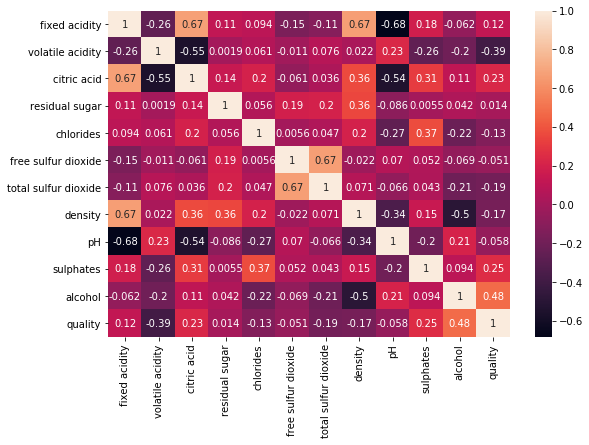

In [18]:
plt.figure(figsize=(9,6))
sns.heatmap(dt_wine.corr(),annot=True)##annot is like array in same shape

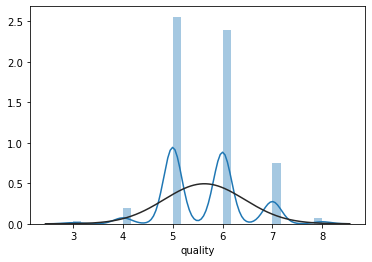

<Figure size 432x288 with 0 Axes>

In [19]:
from scipy import stats
from scipy.stats import norm

sns.distplot(dt_wine['quality'], fit = norm)
fig = plt.figure()


In [20]:
X = data_wine.loc[:, data_wine.columns != 'status']
y = data_wine.loc[:, data_wine.columns == 'status']

In [21]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2,random_state=0)

In [22]:
from sklearn import metrics
import math
import numpy as np

In [23]:
###linear regression
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [24]:
l_model=lm.fit(xtrain,ytrain)

In [25]:
lm.score(xtrain, ytrain)

0.24917064730761132

In [26]:
predict_wine= lm.predict(xtest)

In [27]:
print('MSE:', metrics.mean_squared_error(ytest, predict_wine))
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytest, predict_wine)))

MSE: 0.12024092755282226
RMSE: 0.34675773611099475


In [28]:
"""RMSE is 0.34, which is slightly greater than 7%ofthemean value which is 5.63(QUALITY). 
This means that our algorithm was not very accurate but can still make reasonably good predictions."""

'RMSE is 0.34, which is slightly greater than 7%ofthemean value which is 5.63(QUALITY). \nThis means that our algorithm was not very accurate but can still make reasonably good predictions.'

In [29]:
###crossvalidate
from sklearn.model_selection import cross_val_score


scores = cross_val_score(l_model, xtrain, ytrain, cv=5, n_jobs=-1, scoring = "neg_mean_squared_error")

lin_rmse_scores = np.sqrt(-scores)

lin_rmse_scores.mean()

0.3667693591230484

In [30]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.05, solver="cholesky")
ridge_reg.fit(xtrain, ytrain)

ridge_reg.score(xtrain,ytrain)

0.24707698551764193

In [31]:

from sklearn.metrics import mean_squared_error

ypredict_ridge = ridge_reg.predict(xtrain)

ridge_mse = mean_squared_error(ytrain, ypredict_ridge)
ridge_rmse = np.sqrt(ridge_mse)
ridge_rmse

0.36177155167717084

In [32]:

from sklearn.model_selection import cross_val_score


scores_ridge = cross_val_score(ridge_reg, xtrain, ytrain, cv=5, n_jobs=-1, scoring = "neg_mean_squared_error")

ridge_rmse_scores = np.sqrt(-scores_ridge)
ridge_rmse_scores.mean()

0.366730904860011

In [33]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.05, random_state = 42)
lasso_reg.fit(xtrain, ytrain)

lasso_reg.score(xtrain, ytrain)

0.14067084584863299

In [34]:

from sklearn.metrics import mean_squared_error

ypredict_lasso = lasso_reg.predict(xtrain)

lasso_mse = mean_squared_error(ytrain, ypredict_lasso)
lasso_rmse = np.sqrt(lasso_mse)
lasso_rmse

0.38649056779739904

In [35]:

from sklearn.model_selection import cross_val_score


scores_lasso = cross_val_score(lasso_reg,xtrain, ytrain, cv=5, n_jobs=-1, scoring = "neg_mean_squared_error")

lasso_rmse_scores = np.sqrt(-scores_lasso)
lasso_rmse_scores.mean()

0.38847655923884805

In [36]:
predicted = pd.DataFrame(ypredict_lasso,columns=["probability"],index=xtrain.index)

In [37]:
predicted

,probability
642,0.964712
679,0.928677
473,0.839915
390,0.699267
1096,0.882700
...,...
763,0.955199
835,1.020489
1216,0.997892
559,0.573516


In [38]:
def recode(probability):
    if probability <= 0.5:
        return 0
    elif probability <= 1.0:
        return 1
    else:
        return 2

In [39]:
predicted['predict']=predicted['probability'].apply(recode)

In [40]:
predicted

,probability,predict
642,0.964712,1
679,0.928677,1
473,0.839915,1
390,0.699267,1
1096,0.882700,1
...,...,...
763,0.955199,1
835,1.020489,2
1216,0.997892,1
559,0.573516,1


In [41]:
#print('MAE:', metrics.mean_absolute_error(ytest, predict_wine))
#print('MSE:', metrics.mean_squared_error(ytest, predict_wine))
#print('RMSE:', np.sqrt(metrics.mean_squared_error(ytest, predict_wine)))
#print('R sq: ',lm.score(xtrain,ytrain))
#print('Correlation: ', math.sqrt(lm.score(xtrain,ytrain)))

In [37]:
res = pd.DataFrame(predicted)
res.index = xtrain.index
res.columns = ["predict","probability"]
res.to_csv("result_wine_data.csv")

In [182]:

from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram,linkage

In [124]:
def nor(x):
    a=x-x.min()
    b=x.max()-x.min()
    norm=a/b
    return norm

In [150]:
data1=nor(dt_wine)

In [151]:
X = data1.loc[:, data1.columns != 'status']
y = data1.loc[:, data1.columns == 'status']

In [152]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2,random_state=0)

In [145]:
kmeans=KMeans(n_clusters=2,random_state=10,n_init=1000,max_iter=10000,tol=1e-08,verbose=1).fit(data1)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 334.53475244593307
start iteration
done sorting
end inner loop
Iteration 1, inertia 313.0208466811037
start iteration
done sorting
end inner loop
Iteration 2, inertia 306.9567659241697
start iteration
done sorting
end inner loop
Iteration 3, inertia 305.8523603346283
start iteration
done sorting
end inner loop
Iteration 4, inertia 305.24031220001416
start iteration
done sorting
end inner loop
Iteration 5, inertia 304.7246604636647
start iteration
done sorting
end inner loop
Iteration 6, inertia 304.4912262616485
start iteration
done sorting
end inner loop
Iteration 7, inertia 304.308869050134
start iteration
done sorting
end inner loop
Iteration 8, inertia 304.1345304029154
start iteration
done sorting
end inner loop
Iteration 9, inertia 303.9034497523239
start iteration
done sorting
end inner loop
Iteration 10, inertia 303.33939551934884
start iteration
done sorting
end inner loop
Iteration 11, in

Iteration 6, inertia 281.8351602856984
start iteration
done sorting
end inner loop
Iteration 7, inertia 278.06854820652217
start iteration
done sorting
end inner loop
Iteration 8, inertia 277.0083493722577
start iteration
done sorting
end inner loop
Iteration 9, inertia 276.9369853847626
start iteration
done sorting
end inner loop
Iteration 10, inertia 276.9150875042426
start iteration
done sorting
end inner loop
Iteration 11, inertia 276.9136305335314
start iteration
done sorting
end inner loop
Iteration 12, inertia 276.9136305335314
center shift 0.000000e+00 within tolerance 1.871274e-10
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 288.44883961536664
start iteration
done sorting
end inner loop
Iteration 1, inertia 281.30098703856765
start iteration
done sorting
end inner loop
Iteration 2, inertia 278.46816102215064
start iteration
done sorting
end inner loop
Iteration 3, inertia 277.2362517620103
start iteration
done sorting
end inner loop


start iteration
done sorting
end inner loop
Iteration 5, inertia 282.3979875006123
start iteration
done sorting
end inner loop
Iteration 6, inertia 279.5331203717363
start iteration
done sorting
end inner loop
Iteration 7, inertia 277.87772650316674
start iteration
done sorting
end inner loop
Iteration 8, inertia 277.17642484208994
start iteration
done sorting
end inner loop
Iteration 9, inertia 276.98248383315854
start iteration
done sorting
end inner loop
Iteration 10, inertia 276.9270282506492
start iteration
done sorting
end inner loop
Iteration 11, inertia 276.9144996709034
start iteration
done sorting
end inner loop
Iteration 12, inertia 276.9144996709034
center shift 0.000000e+00 within tolerance 1.871274e-10
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 327.4425806742624
start iteration
done sorting
end inner loop
Iteration 1, inertia 314.3562521198987
start iteration
done sorting
end inner loop
Iteration 2, inertia 305.8613605914211
s

center shift 0.000000e+00 within tolerance 1.871274e-10
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 293.7353328072726
start iteration
done sorting
end inner loop
Iteration 1, inertia 280.36149464618336
start iteration
done sorting
end inner loop
Iteration 2, inertia 277.4452302494335
start iteration
done sorting
end inner loop
Iteration 3, inertia 276.99381222793943
start iteration
done sorting
end inner loop
Iteration 4, inertia 276.9287937541495
start iteration
done sorting
end inner loop
Iteration 5, inertia 276.9150875042426
start iteration
done sorting
end inner loop
Iteration 6, inertia 276.9136305335314
start iteration
done sorting
end inner loop
Iteration 7, inertia 276.9136305335314
center shift 0.000000e+00 within tolerance 1.871274e-10
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 304.07758481544744
start iteration
done sorting
end inner loop
Iteration 1, inertia 288.7022768895387
start i

end inner loop
Iteration 5, inertia 294.6026675227704
start iteration
done sorting
end inner loop
Iteration 6, inertia 281.15580810030997
start iteration
done sorting
end inner loop
Iteration 7, inertia 277.57232726197174
start iteration
done sorting
end inner loop
Iteration 8, inertia 276.99873775404274
start iteration
done sorting
end inner loop
Iteration 9, inertia 276.9165957518821
start iteration
done sorting
end inner loop
Iteration 10, inertia 276.9144996709034
start iteration
done sorting
end inner loop
Iteration 11, inertia 276.9144996709034
center shift 0.000000e+00 within tolerance 1.871274e-10
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 309.68095040138223
start iteration
done sorting
end inner loop
Iteration 1, inertia 297.1140340302029
start iteration
done sorting
end inner loop
Iteration 2, inertia 288.90198368452184
start iteration
done sorting
end inner loop
Iteration 3, inertia 282.3925583420005
start iteration
done sorting


end inner loop
Iteration 3, inertia 297.049327122533
start iteration
done sorting
end inner loop
Iteration 4, inertia 286.2234177280974
start iteration
done sorting
end inner loop
Iteration 5, inertia 281.6724706589414
start iteration
done sorting
end inner loop
Iteration 6, inertia 278.88460201372686
start iteration
done sorting
end inner loop
Iteration 7, inertia 277.5578389062209
start iteration
done sorting
end inner loop
Iteration 8, inertia 277.05550827191104
start iteration
done sorting
end inner loop
Iteration 9, inertia 276.92810519652284
start iteration
done sorting
end inner loop
Iteration 10, inertia 276.9150875042426
start iteration
done sorting
end inner loop
Iteration 11, inertia 276.9136305335314
start iteration
done sorting
end inner loop
Iteration 12, inertia 276.9136305335314
center shift 0.000000e+00 within tolerance 1.871274e-10
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 320.74536611278626
start iteration
done sorting
e

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 299.55812496738343
start iteration
done sorting
end inner loop
Iteration 1, inertia 290.0365785894378
start iteration
done sorting
end inner loop
Iteration 2, inertia 282.76418751810644
start iteration
done sorting
end inner loop
Iteration 3, inertia 278.8840174538931
start iteration
done sorting
end inner loop
Iteration 4, inertia 277.1999376988748
start iteration
done sorting
end inner loop
Iteration 5, inertia 277.0013226353241
start iteration
done sorting
end inner loop
Iteration 6, inertia 276.9369853847626
start iteration
done sorting
end inner loop
Iteration 7, inertia 276.9150875042426
start iteration
done sorting
end inner loop
Iteration 8, inertia 276.9136305335314
start iteration
done sorting
end inner loop
Iteration 9, inertia 276.9136305335314
center shift 0.000000e+00 within tolerance 1.871274e-10
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia

Iteration 1, inertia 277.86408279498687
start iteration
done sorting
end inner loop
Iteration 2, inertia 277.0540028477749
start iteration
done sorting
end inner loop
Iteration 3, inertia 276.9434072245884
start iteration
done sorting
end inner loop
Iteration 4, inertia 276.91853258292804
start iteration
done sorting
end inner loop
Iteration 5, inertia 276.9144996709034
start iteration
done sorting
end inner loop
Iteration 6, inertia 276.9144996709034
center shift 0.000000e+00 within tolerance 1.871274e-10
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 286.19657139142737
start iteration
done sorting
end inner loop
Iteration 1, inertia 278.6152560455424
start iteration
done sorting
end inner loop
Iteration 2, inertia 277.4585440859271
start iteration
done sorting
end inner loop
Iteration 3, inertia 277.0693331945897
start iteration
done sorting
end inner loop
Iteration 4, inertia 276.94333968001865
start iteration
done sorting
end inner loop
Ite

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 322.5086393360582
start iteration
done sorting
end inner loop
Iteration 1, inertia 299.3493935399715
start iteration
done sorting
end inner loop
Iteration 2, inertia 282.605342476686
start iteration
done sorting
end inner loop
Iteration 3, inertia 278.65060251583384
start iteration
done sorting
end inner loop
Iteration 4, inertia 277.4762085746479
start iteration
done sorting
end inner loop
Iteration 5, inertia 276.9991499835389
start iteration
done sorting
end inner loop
Iteration 6, inertia 276.9378690658923
start iteration
done sorting
end inner loop
Iteration 7, inertia 276.91853258292804
start iteration
done sorting
end inner loop
Iteration 8, inertia 276.9144996709034
start iteration
done sorting
end inner loop
Iteration 9, inertia 276.9144996709034
center shift 0.000000e+00 within tolerance 1.871274e-10
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 

Iteration 0, inertia 317.7779837762549
start iteration
done sorting
end inner loop
Iteration 1, inertia 302.4517039625006
start iteration
done sorting
end inner loop
Iteration 2, inertia 296.690797078848
start iteration
done sorting
end inner loop
Iteration 3, inertia 290.41260511802614
start iteration
done sorting
end inner loop
Iteration 4, inertia 283.82236790835873
start iteration
done sorting
end inner loop
Iteration 5, inertia 278.8810852762077
start iteration
done sorting
end inner loop
Iteration 6, inertia 277.2029310466851
start iteration
done sorting
end inner loop
Iteration 7, inertia 276.9984769691859
start iteration
done sorting
end inner loop
Iteration 8, inertia 276.9369853847626
start iteration
done sorting
end inner loop
Iteration 9, inertia 276.9150875042426
start iteration
done sorting
end inner loop
Iteration 10, inertia 276.9136305335314
start iteration
done sorting
end inner loop
Iteration 11, inertia 276.9136305335314
center shift 0.000000e+00 within tolerance 1.

Iteration 11, inertia 276.9144996709034
center shift 0.000000e+00 within tolerance 1.871274e-10
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 333.8883452571993
start iteration
done sorting
end inner loop
Iteration 1, inertia 310.3485751129008
start iteration
done sorting
end inner loop
Iteration 2, inertia 287.24989247984786
start iteration
done sorting
end inner loop
Iteration 3, inertia 279.5246576332809
start iteration
done sorting
end inner loop
Iteration 4, inertia 277.5798464439553
start iteration
done sorting
end inner loop
Iteration 5, inertia 276.9991499835389
start iteration
done sorting
end inner loop
Iteration 6, inertia 276.9378690658923
start iteration
done sorting
end inner loop
Iteration 7, inertia 276.91853258292804
start iteration
done sorting
end inner loop
Iteration 8, inertia 276.9144996709034
start iteration
done sorting
end inner loop
Iteration 9, inertia 276.9144996709034
center shift 0.000000e+00 within tolerance 1.871

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 288.3393676794436
start iteration
done sorting
end inner loop
Iteration 1, inertia 277.87819531255525
start iteration
done sorting
end inner loop
Iteration 2, inertia 276.9400832463842
start iteration
done sorting
end inner loop
Iteration 3, inertia 276.914264685462
start iteration
done sorting
end inner loop
Iteration 4, inertia 276.91361644012534
start iteration
done sorting
end inner loop
Iteration 5, inertia 276.91361644012534
center shift 0.000000e+00 within tolerance 1.871274e-10
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 280.47429908714093
start iteration
done sorting
end inner loop
Iteration 1, inertia 277.55936601125643
start iteration
done sorting
end inner loop
Iteration 2, inertia 277.06620423117374
start iteration
done sorting
end inner loop
Iteration 3, inertia 276.9472890185187
start iteration
done sorting
end inner loop
Iteration 4, iner

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 293.56607083437444
start iteration
done sorting
end inner loop
Iteration 1, inertia 283.85013757352857
start iteration
done sorting
end inner loop
Iteration 2, inertia 280.7924835959461
start iteration
done sorting
end inner loop
Iteration 3, inertia 278.7544742146732
start iteration
done sorting
end inner loop
Iteration 4, inertia 277.6136867344487
start iteration
done sorting
end inner loop
Iteration 5, inertia 277.0840218061986
start iteration
done sorting
end inner loop
Iteration 6, inertia 276.9651266176715
start iteration
done sorting
end inner loop
Iteration 7, inertia 276.9205191700101
start iteration
done sorting
end inner loop
Iteration 8, inertia 276.9144996709034
start iteration
done sorting
end inner loop
Iteration 9, inertia 276.9144996709034
center shift 0.000000e+00 within tolerance 1.871274e-10
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia

end inner loop
Iteration 9, inertia 276.91853258292804
start iteration
done sorting
end inner loop
Iteration 10, inertia 276.9144996709034
start iteration
done sorting
end inner loop
Iteration 11, inertia 276.9144996709034
center shift 0.000000e+00 within tolerance 1.871274e-10
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 326.4648385879533
start iteration
done sorting
end inner loop
Iteration 1, inertia 320.0653129997874
start iteration
done sorting
end inner loop
Iteration 2, inertia 309.7306545534524
start iteration
done sorting
end inner loop
Iteration 3, inertia 286.5228459292158
start iteration
done sorting
end inner loop
Iteration 4, inertia 278.3012276369002
start iteration
done sorting
end inner loop
Iteration 5, inertia 276.95337028599084
start iteration
done sorting
end inner loop
Iteration 6, inertia 276.9165957518821
start iteration
done sorting
end inner loop
Iteration 7, inertia 276.9144996709034
start iteration
done sorting
end

Iteration 10, inertia 276.9434072245884
start iteration
done sorting
end inner loop
Iteration 11, inertia 276.91853258292804
start iteration
done sorting
end inner loop
Iteration 12, inertia 276.9144996709034
start iteration
done sorting
end inner loop
Iteration 13, inertia 276.9144996709034
center shift 0.000000e+00 within tolerance 1.871274e-10
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 284.30510430316497
start iteration
done sorting
end inner loop
Iteration 1, inertia 279.3111202394015
start iteration
done sorting
end inner loop
Iteration 2, inertia 277.7309113745544
start iteration
done sorting
end inner loop
Iteration 3, inertia 277.1779699141036
start iteration
done sorting
end inner loop
Iteration 4, inertia 277.0013226353241
start iteration
done sorting
end inner loop
Iteration 5, inertia 276.9369853847626
start iteration
done sorting
end inner loop
Iteration 6, inertia 276.9150875042426
start iteration
done sorting
end inner loop
I

end inner loop
Iteration 0, inertia 289.3222151474737
start iteration
done sorting
end inner loop
Iteration 1, inertia 279.20114869613997
start iteration
done sorting
end inner loop
Iteration 2, inertia 277.75192780624445
start iteration
done sorting
end inner loop
Iteration 3, inertia 277.1209534889514
start iteration
done sorting
end inner loop
Iteration 4, inertia 276.92810519652284
start iteration
done sorting
end inner loop
Iteration 5, inertia 276.9150875042426
start iteration
done sorting
end inner loop
Iteration 6, inertia 276.9136305335314
start iteration
done sorting
end inner loop
Iteration 7, inertia 276.9136305335314
center shift 0.000000e+00 within tolerance 1.871274e-10
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 321.09892559747294
start iteration
done sorting
end inner loop
Iteration 1, inertia 309.40767326116605
start iteration
done sorting
end inner loop
Iteration 2, inertia 303.88311024465986
start iteration
done sorting
e

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 312.1070169270638
start iteration
done sorting
end inner loop
Iteration 1, inertia 306.2385189466211
start iteration
done sorting
end inner loop
Iteration 2, inertia 304.30643902176683
start iteration
done sorting
end inner loop
Iteration 3, inertia 303.06790760588814
start iteration
done sorting
end inner loop
Iteration 4, inertia 301.9381304614574
start iteration
done sorting
end inner loop
Iteration 5, inertia 299.66088472727495
start iteration
done sorting
end inner loop
Iteration 6, inertia 295.8267098936877
start iteration
done sorting
end inner loop
Iteration 7, inertia 289.5337128546575
start iteration
done sorting
end inner loop
Iteration 8, inertia 282.63256220815725
start iteration
done sorting
end inner loop
Iteration 9, inertia 278.5774813735668
start iteration
done sorting
end inner loop
Iteration 10, inertia 277.1383745858289
start iteration
done sorting
end inner loop
Iteration 11, 

end inner loop
Iteration 5, inertia 305.32991353979344
start iteration
done sorting
end inner loop
Iteration 6, inertia 304.85643741844274
start iteration
done sorting
end inner loop
Iteration 7, inertia 304.584471013283
start iteration
done sorting
end inner loop
Iteration 8, inertia 304.4178803233659
start iteration
done sorting
end inner loop
Iteration 9, inertia 304.23438917824103
start iteration
done sorting
end inner loop
Iteration 10, inertia 304.0868973156322
start iteration
done sorting
end inner loop
Iteration 11, inertia 303.87883199238263
start iteration
done sorting
end inner loop
Iteration 12, inertia 303.27590622280184
start iteration
done sorting
end inner loop
Iteration 13, inertia 302.2665342992192
start iteration
done sorting
end inner loop
Iteration 14, inertia 300.5019041691723
start iteration
done sorting
end inner loop
Iteration 15, inertia 297.2603995269662
start iteration
done sorting
end inner loop
Iteration 16, inertia 291.21737787384603
start iteration
done 

end inner loop
Iteration 1, inertia 306.48043987350496
start iteration
done sorting
end inner loop
Iteration 2, inertia 291.30806612990693
start iteration
done sorting
end inner loop
Iteration 3, inertia 280.5565090783131
start iteration
done sorting
end inner loop
Iteration 4, inertia 277.601970830851
start iteration
done sorting
end inner loop
Iteration 5, inertia 276.9494460961182
start iteration
done sorting
end inner loop
Iteration 6, inertia 276.9150875042426
start iteration
done sorting
end inner loop
Iteration 7, inertia 276.9136305335314
start iteration
done sorting
end inner loop
Iteration 8, inertia 276.9136305335314
center shift 0.000000e+00 within tolerance 1.871274e-10
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 289.27539375562156
start iteration
done sorting
end inner loop
Iteration 1, inertia 281.97762395686317
start iteration
done sorting
end inner loop
Iteration 2, inertia 279.1871785400794
start iteration
done sorting
end 

Iteration 12, inertia 278.5774813735668
start iteration
done sorting
end inner loop
Iteration 13, inertia 277.1383745858289
start iteration
done sorting
end inner loop
Iteration 14, inertia 277.0013226353241
start iteration
done sorting
end inner loop
Iteration 15, inertia 276.9369853847626
start iteration
done sorting
end inner loop
Iteration 16, inertia 276.9150875042426
start iteration
done sorting
end inner loop
Iteration 17, inertia 276.9136305335314
start iteration
done sorting
end inner loop
Iteration 18, inertia 276.9136305335314
center shift 0.000000e+00 within tolerance 1.871274e-10
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 322.2880532657274
start iteration
done sorting
end inner loop
Iteration 1, inertia 304.92972048794604
start iteration
done sorting
end inner loop
Iteration 2, inertia 292.0717699976839
start iteration
done sorting
end inner loop
Iteration 3, inertia 286.14317359584595
start iteration
done sorting
end inner loo

Iteration 7, inertia 276.9136305335314
start iteration
done sorting
end inner loop
Iteration 8, inertia 276.9136305335314
center shift 0.000000e+00 within tolerance 1.871274e-10
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 285.80181283408285
start iteration
done sorting
end inner loop
Iteration 1, inertia 279.0134741374678
start iteration
done sorting
end inner loop
Iteration 2, inertia 277.3527332276217
start iteration
done sorting
end inner loop
Iteration 3, inertia 276.96099731544587
start iteration
done sorting
end inner loop
Iteration 4, inertia 276.91361644012534
start iteration
done sorting
end inner loop
Iteration 5, inertia 276.91361644012534
center shift 0.000000e+00 within tolerance 1.871274e-10
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 289.8683155675261
start iteration
done sorting
end inner loop
Iteration 1, inertia 281.83007640838406
start iteration
done sorting
end inner loop
Itera

end inner loop
Iteration 0, inertia 285.8100126071063
start iteration
done sorting
end inner loop
Iteration 1, inertia 279.81299041679216
start iteration
done sorting
end inner loop
Iteration 2, inertia 277.7711931334155
start iteration
done sorting
end inner loop
Iteration 3, inertia 277.14940702947973
start iteration
done sorting
end inner loop
Iteration 4, inertia 277.0013226353241
start iteration
done sorting
end inner loop
Iteration 5, inertia 276.9369853847626
start iteration
done sorting
end inner loop
Iteration 6, inertia 276.9150875042426
start iteration
done sorting
end inner loop
Iteration 7, inertia 276.9136305335314
start iteration
done sorting
end inner loop
Iteration 8, inertia 276.9136305335314
center shift 0.000000e+00 within tolerance 1.871274e-10
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 290.22875941798196
start iteration
done sorting
end inner loop
Iteration 1, inertia 280.46780673105854
start iteration
done sorting
end

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 279.07674133601176
start iteration
done sorting
end inner loop
Iteration 1, inertia 277.0733157360087
start iteration
done sorting
end inner loop
Iteration 2, inertia 276.94644207983
start iteration
done sorting
end inner loop
Iteration 3, inertia 276.9150875042426
start iteration
done sorting
end inner loop
Iteration 4, inertia 276.9136305335314
start iteration
done sorting
end inner loop
Iteration 5, inertia 276.9136305335314
center shift 0.000000e+00 within tolerance 1.871274e-10
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 316.9428656962442
start iteration
done sorting
end inner loop
Iteration 1, inertia 311.3252814058983
start iteration
done sorting
end inner loop
Iteration 2, inertia 308.71681010873266
start iteration
done sorting
end inner loop
Iteration 3, inertia 307.1183614123341
start iteration
done sorting
end inner loop
Iteration 4, inertia 3

Iteration 3, inertia 278.1296650564457
start iteration
done sorting
end inner loop
Iteration 4, inertia 277.0670907041657
start iteration
done sorting
end inner loop
Iteration 5, inertia 276.95307633532457
start iteration
done sorting
end inner loop
Iteration 6, inertia 276.9150875042426
start iteration
done sorting
end inner loop
Iteration 7, inertia 276.9136305335314
start iteration
done sorting
end inner loop
Iteration 8, inertia 276.9136305335314
center shift 0.000000e+00 within tolerance 1.871274e-10
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 299.8758597525132
start iteration
done sorting
end inner loop
Iteration 1, inertia 281.4564686413029
start iteration
done sorting
end inner loop
Iteration 2, inertia 277.42498261597297
start iteration
done sorting
end inner loop
Iteration 3, inertia 276.9265785600842
start iteration
done sorting
end inner loop
Iteration 4, inertia 276.9150875042426
start iteration
done sorting
end inner loop
Itera

end inner loop
Iteration 3, inertia 277.3830661001041
start iteration
done sorting
end inner loop
Iteration 4, inertia 276.9852023277132
start iteration
done sorting
end inner loop
Iteration 5, inertia 276.9270282506492
start iteration
done sorting
end inner loop
Iteration 6, inertia 276.9144996709034
start iteration
done sorting
end inner loop
Iteration 7, inertia 276.9144996709034
center shift 0.000000e+00 within tolerance 1.871274e-10
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 312.70651166905566
start iteration
done sorting
end inner loop
Iteration 1, inertia 299.97892418690236
start iteration
done sorting
end inner loop
Iteration 2, inertia 294.04772548650607
start iteration
done sorting
end inner loop
Iteration 3, inertia 287.2466872964994
start iteration
done sorting
end inner loop
Iteration 4, inertia 281.3077590844713
start iteration
done sorting
end inner loop
Iteration 5, inertia 278.0864230650237
start iteration
done sorting
end 

Iteration 4, inertia 276.9144996709034
start iteration
done sorting
end inner loop
Iteration 5, inertia 276.9144996709034
center shift 0.000000e+00 within tolerance 1.871274e-10
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 305.3524932240543
start iteration
done sorting
end inner loop
Iteration 1, inertia 289.7550848309383
start iteration
done sorting
end inner loop
Iteration 2, inertia 284.58792221686235
start iteration
done sorting
end inner loop
Iteration 3, inertia 281.242349069047
start iteration
done sorting
end inner loop
Iteration 4, inertia 279.0001560050454
start iteration
done sorting
end inner loop
Iteration 5, inertia 277.67040999029626
start iteration
done sorting
end inner loop
Iteration 6, inertia 277.1050802042313
start iteration
done sorting
end inner loop
Iteration 7, inertia 276.9651266176715
start iteration
done sorting
end inner loop
Iteration 8, inertia 276.9205191700101
start iteration
done sorting
end inner loop
Iterat

Iteration 0, inertia 312.6376005306519
start iteration
done sorting
end inner loop
Iteration 1, inertia 292.6616637115807
start iteration
done sorting
end inner loop
Iteration 2, inertia 285.3052162416497
start iteration
done sorting
end inner loop
Iteration 3, inertia 281.1079961465589
start iteration
done sorting
end inner loop
Iteration 4, inertia 278.24004124620984
start iteration
done sorting
end inner loop
Iteration 5, inertia 277.16110026964634
start iteration
done sorting
end inner loop
Iteration 6, inertia 276.9473579863375
start iteration
done sorting
end inner loop
Iteration 7, inertia 276.9144996709034
start iteration
done sorting
end inner loop
Iteration 8, inertia 276.9144996709034
center shift 0.000000e+00 within tolerance 1.871274e-10
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 288.63334683345124
start iteration
done sorting
end inner loop
Iteration 1, inertia 281.8889368486046
start iteration
done sorting
end inner loop
Iter

end inner loop
Iteration 3, inertia 281.93955535185944
start iteration
done sorting
end inner loop
Iteration 4, inertia 278.39420199255125
start iteration
done sorting
end inner loop
Iteration 5, inertia 277.16748200721855
start iteration
done sorting
end inner loop
Iteration 6, inertia 277.0013226353241
start iteration
done sorting
end inner loop
Iteration 7, inertia 276.9369853847626
start iteration
done sorting
end inner loop
Iteration 8, inertia 276.9150875042426
start iteration
done sorting
end inner loop
Iteration 9, inertia 276.9136305335314
start iteration
done sorting
end inner loop
Iteration 10, inertia 276.9136305335314
center shift 0.000000e+00 within tolerance 1.871274e-10
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 304.8371740475352
start iteration
done sorting
end inner loop
Iteration 1, inertia 299.51505854228367
start iteration
done sorting
end inner loop
Iteration 2, inertia 293.52693610756234
start iteration
done sorting
e

end inner loop
Iteration 5, inertia 277.02070310564324
start iteration
done sorting
end inner loop
Iteration 6, inertia 276.9287937541495
start iteration
done sorting
end inner loop
Iteration 7, inertia 276.9150875042426
start iteration
done sorting
end inner loop
Iteration 8, inertia 276.9136305335314
start iteration
done sorting
end inner loop
Iteration 9, inertia 276.9136305335314
center shift 0.000000e+00 within tolerance 1.871274e-10
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 288.6098446502517
start iteration
done sorting
end inner loop
Iteration 1, inertia 281.79943968049065
start iteration
done sorting
end inner loop
Iteration 2, inertia 278.22762689930795
start iteration
done sorting
end inner loop
Iteration 3, inertia 277.1091776942518
start iteration
done sorting
end inner loop
Iteration 4, inertia 276.95307633532457
start iteration
done sorting
end inner loop
Iteration 5, inertia 276.9150875042426
start iteration
done sorting
end

Iteration 1, inertia 279.52902415761986
start iteration
done sorting
end inner loop
Iteration 2, inertia 277.7117004902834
start iteration
done sorting
end inner loop
Iteration 3, inertia 277.09203431257833
start iteration
done sorting
end inner loop
Iteration 4, inertia 276.9651266176715
start iteration
done sorting
end inner loop
Iteration 5, inertia 276.9205191700101
start iteration
done sorting
end inner loop
Iteration 6, inertia 276.9144996709034
start iteration
done sorting
end inner loop
Iteration 7, inertia 276.9144996709034
center shift 0.000000e+00 within tolerance 1.871274e-10
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 295.1501083553194
start iteration
done sorting
end inner loop
Iteration 1, inertia 283.8413324349896
start iteration
done sorting
end inner loop
Iteration 2, inertia 280.68897497190267
start iteration
done sorting
end inner loop
Iteration 3, inertia 278.65537046049536
start iteration
done sorting
end inner loop
Ite

Iteration 3, inertia 282.820841625177
start iteration
done sorting
end inner loop
Iteration 4, inertia 280.11333567857406
start iteration
done sorting
end inner loop
Iteration 5, inertia 278.25943129277493
start iteration
done sorting
end inner loop
Iteration 6, inertia 277.44593068277294
start iteration
done sorting
end inner loop
Iteration 7, inertia 277.01658645667317
start iteration
done sorting
end inner loop
Iteration 8, inertia 276.9434072245884
start iteration
done sorting
end inner loop
Iteration 9, inertia 276.91853258292804
start iteration
done sorting
end inner loop
Iteration 10, inertia 276.9144996709034
start iteration
done sorting
end inner loop
Iteration 11, inertia 276.9144996709034
center shift 0.000000e+00 within tolerance 1.871274e-10
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 296.68023910014193
start iteration
done sorting
end inner loop
Iteration 1, inertia 285.9061682531646
start iteration
done sorting
end inner loop


Iteration 7, inertia 276.9136305335314
start iteration
done sorting
end inner loop
Iteration 8, inertia 276.9136305335314
center shift 0.000000e+00 within tolerance 1.871274e-10
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 308.4411886705027
start iteration
done sorting
end inner loop
Iteration 1, inertia 304.92298942572603
start iteration
done sorting
end inner loop
Iteration 2, inertia 304.4498900554679
start iteration
done sorting
end inner loop
Iteration 3, inertia 304.2451738869446
start iteration
done sorting
end inner loop
Iteration 4, inertia 304.0914379106787
start iteration
done sorting
end inner loop
Iteration 5, inertia 303.87883199238263
start iteration
done sorting
end inner loop
Iteration 6, inertia 303.27590622280184
start iteration
done sorting
end inner loop
Iteration 7, inertia 302.2665342992192
start iteration
done sorting
end inner loop
Iteration 8, inertia 300.5019041691723
start iteration
done sorting
end inner loop
Iter

done sorting
end inner loop
Iteration 9, inertia 276.9136305335314
center shift 0.000000e+00 within tolerance 1.871274e-10
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 278.8914373418763
start iteration
done sorting
end inner loop
Iteration 1, inertia 277.1980820181371
start iteration
done sorting
end inner loop
Iteration 2, inertia 277.00753088836217
start iteration
done sorting
end inner loop
Iteration 3, inertia 276.94333968001865
start iteration
done sorting
end inner loop
Iteration 4, inertia 276.9150875042426
start iteration
done sorting
end inner loop
Iteration 5, inertia 276.9136305335314
start iteration
done sorting
end inner loop
Iteration 6, inertia 276.9136305335314
center shift 0.000000e+00 within tolerance 1.871274e-10
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 321.9893198850062
start iteration
done sorting
end inner loop
Iteration 1, inertia 295.7598215269985
start iteration
done sor

Iteration 9, inertia 276.91361644012534
center shift 0.000000e+00 within tolerance 1.871274e-10
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 293.83277150271095
start iteration
done sorting
end inner loop
Iteration 1, inertia 282.6106216171085
start iteration
done sorting
end inner loop
Iteration 2, inertia 278.54051307155856
start iteration
done sorting
end inner loop
Iteration 3, inertia 277.16519176845753
start iteration
done sorting
end inner loop
Iteration 4, inertia 277.0013226353241
start iteration
done sorting
end inner loop
Iteration 5, inertia 276.9369853847626
start iteration
done sorting
end inner loop
Iteration 6, inertia 276.9150875042426
start iteration
done sorting
end inner loop
Iteration 7, inertia 276.9136305335314
start iteration
done sorting
end inner loop
Iteration 8, inertia 276.9136305335314
center shift 0.000000e+00 within tolerance 1.871274e-10
Initialization complete
start iteration
done sorting
end inner loop
Iterat

Iteration 10, inertia 276.9144996709034
start iteration
done sorting
end inner loop
Iteration 11, inertia 276.9144996709034
center shift 0.000000e+00 within tolerance 1.871274e-10
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 289.1083779119138
start iteration
done sorting
end inner loop
Iteration 1, inertia 282.19055315195925
start iteration
done sorting
end inner loop
Iteration 2, inertia 279.495590690847
start iteration
done sorting
end inner loop
Iteration 3, inertia 277.87427147055996
start iteration
done sorting
end inner loop
Iteration 4, inertia 277.18339339792567
start iteration
done sorting
end inner loop
Iteration 5, inertia 276.98248383315854
start iteration
done sorting
end inner loop
Iteration 6, inertia 276.9270282506492
start iteration
done sorting
end inner loop
Iteration 7, inertia 276.9144996709034
start iteration
done sorting
end inner loop
Iteration 8, inertia 276.9144996709034
center shift 0.000000e+00 within tolerance 1.8

Iteration 3, inertia 277.17795316836896
start iteration
done sorting
end inner loop
Iteration 4, inertia 277.0013226353241
start iteration
done sorting
end inner loop
Iteration 5, inertia 276.9369853847626
start iteration
done sorting
end inner loop
Iteration 6, inertia 276.9150875042426
start iteration
done sorting
end inner loop
Iteration 7, inertia 276.9136305335314
start iteration
done sorting
end inner loop
Iteration 8, inertia 276.9136305335314
center shift 0.000000e+00 within tolerance 1.871274e-10
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 350.01159841391996
start iteration
done sorting
end inner loop
Iteration 1, inertia 338.54678428552234
start iteration
done sorting
end inner loop
Iteration 2, inertia 329.7134490343981
start iteration
done sorting
end inner loop
Iteration 3, inertia 324.2371602541728
start iteration
done sorting
end inner loop
Iteration 4, inertia 317.15628617079614
start iteration
done sorting
end inner loop
Ite

Iteration 2, inertia 306.5172049760348
start iteration
done sorting
end inner loop
Iteration 3, inertia 305.7973209900399
start iteration
done sorting
end inner loop
Iteration 4, inertia 305.20981875872104
start iteration
done sorting
end inner loop
Iteration 5, inertia 304.7010209897624
start iteration
done sorting
end inner loop
Iteration 6, inertia 304.46585034381536
start iteration
done sorting
end inner loop
Iteration 7, inertia 304.3064514012705
start iteration
done sorting
end inner loop
Iteration 8, inertia 304.1345304029154
start iteration
done sorting
end inner loop
Iteration 9, inertia 303.9034497523239
start iteration
done sorting
end inner loop
Iteration 10, inertia 303.33939551934884
start iteration
done sorting
end inner loop
Iteration 11, inertia 302.31114125279464
start iteration
done sorting
end inner loop
Iteration 12, inertia 300.75105436456994
start iteration
done sorting
end inner loop
Iteration 13, inertia 297.6616757101097
start iteration
done sorting
end inner 

Iteration 7, inertia 305.47001143310234
start iteration
done sorting
end inner loop
Iteration 8, inertia 304.9132504361503
start iteration
done sorting
end inner loop
Iteration 9, inertia 304.6180985573623
start iteration
done sorting
end inner loop
Iteration 10, inertia 304.43538729702476
start iteration
done sorting
end inner loop
Iteration 11, inertia 304.2641440277071
start iteration
done sorting
end inner loop
Iteration 12, inertia 304.084516917174
start iteration
done sorting
end inner loop
Iteration 13, inertia 303.87466575482097
start iteration
done sorting
end inner loop
Iteration 14, inertia 303.20563318707934
start iteration
done sorting
end inner loop
Iteration 15, inertia 302.23371403757426
start iteration
done sorting
end inner loop
Iteration 16, inertia 300.4309868276795
start iteration
done sorting
end inner loop
Iteration 17, inertia 296.9742701000233
start iteration
done sorting
end inner loop
Iteration 18, inertia 290.9636599793542
start iteration
done sorting
end in

done sorting
end inner loop
Iteration 2, inertia 297.13625782162933
start iteration
done sorting
end inner loop
Iteration 3, inertia 291.000952422351
start iteration
done sorting
end inner loop
Iteration 4, inertia 284.03429923451637
start iteration
done sorting
end inner loop
Iteration 5, inertia 279.3904268061544
start iteration
done sorting
end inner loop
Iteration 6, inertia 277.2725392702673
start iteration
done sorting
end inner loop
Iteration 7, inertia 277.0013226353241
start iteration
done sorting
end inner loop
Iteration 8, inertia 276.9369853847626
start iteration
done sorting
end inner loop
Iteration 9, inertia 276.9150875042426
start iteration
done sorting
end inner loop
Iteration 10, inertia 276.9136305335314
start iteration
done sorting
end inner loop
Iteration 11, inertia 276.9136305335314
center shift 0.000000e+00 within tolerance 1.871274e-10
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 294.4444100851376
start iteration
done

Iteration 7, inertia 276.91853258292804
start iteration
done sorting
end inner loop
Iteration 8, inertia 276.9144996709034
start iteration
done sorting
end inner loop
Iteration 9, inertia 276.9144996709034
center shift 0.000000e+00 within tolerance 1.871274e-10
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 355.17934205791124
start iteration
done sorting
end inner loop
Iteration 1, inertia 345.00360844876883
start iteration
done sorting
end inner loop
Iteration 2, inertia 322.41095029895155
start iteration
done sorting
end inner loop
Iteration 3, inertia 310.3276620315967
start iteration
done sorting
end inner loop
Iteration 4, inertia 305.91557211463606
start iteration
done sorting
end inner loop
Iteration 5, inertia 301.80002066468415
start iteration
done sorting
end inner loop
Iteration 6, inertia 296.4966311928411
start iteration
done sorting
end inner loop
Iteration 7, inertia 290.61608387254904
start iteration
done sorting
end inner loop


start iteration
done sorting
end inner loop
Iteration 5, inertia 276.9863607754993
start iteration
done sorting
end inner loop
Iteration 6, inertia 276.92375319559346
start iteration
done sorting
end inner loop
Iteration 7, inertia 276.9150875042426
start iteration
done sorting
end inner loop
Iteration 8, inertia 276.9136305335314
start iteration
done sorting
end inner loop
Iteration 9, inertia 276.9136305335314
center shift 0.000000e+00 within tolerance 1.871274e-10
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 283.7954119875871
start iteration
done sorting
end inner loop
Iteration 1, inertia 277.5748593158837
start iteration
done sorting
end inner loop
Iteration 2, inertia 277.0413492299572
start iteration
done sorting
end inner loop
Iteration 3, inertia 276.9464025392042
start iteration
done sorting
end inner loop
Iteration 4, inertia 276.9150875042426
start iteration
done sorting
end inner loop
Iteration 5, inertia 276.9136305335314
start 

start iteration
done sorting
end inner loop
Iteration 3, inertia 304.6732612169551
start iteration
done sorting
end inner loop
Iteration 4, inertia 304.46232257202274
start iteration
done sorting
end inner loop
Iteration 5, inertia 304.333114557936
start iteration
done sorting
end inner loop
Iteration 6, inertia 304.18147334395724
start iteration
done sorting
end inner loop
Iteration 7, inertia 303.9749577327138
start iteration
done sorting
end inner loop
Iteration 8, inertia 303.57556713056056
start iteration
done sorting
end inner loop
Iteration 9, inertia 302.58998024148315
start iteration
done sorting
end inner loop
Iteration 10, inertia 301.2567813078145
start iteration
done sorting
end inner loop
Iteration 11, inertia 298.4243905503984
start iteration
done sorting
end inner loop
Iteration 12, inertia 292.57181577916685
start iteration
done sorting
end inner loop
Iteration 13, inertia 285.74169595364356
start iteration
done sorting
end inner loop
Iteration 14, inertia 280.58575798

done sorting
end inner loop
Iteration 9, inertia 276.91853258292804
start iteration
done sorting
end inner loop
Iteration 10, inertia 276.9144996709034
start iteration
done sorting
end inner loop
Iteration 11, inertia 276.9144996709034
center shift 0.000000e+00 within tolerance 1.871274e-10
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 296.91396765551235
start iteration
done sorting
end inner loop
Iteration 1, inertia 280.58519296461054
start iteration
done sorting
end inner loop
Iteration 2, inertia 277.9902790875933
start iteration
done sorting
end inner loop
Iteration 3, inertia 277.2083469989923
start iteration
done sorting
end inner loop
Iteration 4, inertia 277.0013226353241
start iteration
done sorting
end inner loop
Iteration 5, inertia 276.9369853847626
start iteration
done sorting
end inner loop
Iteration 6, inertia 276.9150875042426
start iteration
done sorting
end inner loop
Iteration 7, inertia 276.9136305335314
start iteration
do

start iteration
done sorting
end inner loop
Iteration 3, inertia 277.0143461457428
start iteration
done sorting
end inner loop
Iteration 4, inertia 276.94333968001865
start iteration
done sorting
end inner loop
Iteration 5, inertia 276.9150875042426
start iteration
done sorting
end inner loop
Iteration 6, inertia 276.9136305335314
start iteration
done sorting
end inner loop
Iteration 7, inertia 276.9136305335314
center shift 0.000000e+00 within tolerance 1.871274e-10
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 298.5823498117875
start iteration
done sorting
end inner loop
Iteration 1, inertia 287.97620082649127
start iteration
done sorting
end inner loop
Iteration 2, inertia 281.63135191284016
start iteration
done sorting
end inner loop
Iteration 3, inertia 278.28252687143566
start iteration
done sorting
end inner loop
Iteration 4, inertia 277.17757815569274
start iteration
done sorting
end inner loop
Iteration 5, inertia 277.0013226353241
st

Iteration 7, inertia 278.2492670604405
start iteration
done sorting
end inner loop
Iteration 8, inertia 277.06327061519676
start iteration
done sorting
end inner loop
Iteration 9, inertia 276.94333968001865
start iteration
done sorting
end inner loop
Iteration 10, inertia 276.9150875042426
start iteration
done sorting
end inner loop
Iteration 11, inertia 276.9136305335314
start iteration
done sorting
end inner loop
Iteration 12, inertia 276.9136305335314
center shift 0.000000e+00 within tolerance 1.871274e-10
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 286.42167696611597
start iteration
done sorting
end inner loop
Iteration 1, inertia 280.900514780937
start iteration
done sorting
end inner loop
Iteration 2, inertia 278.3226631025433
start iteration
done sorting
end inner loop
Iteration 3, inertia 277.1708232859687
start iteration
done sorting
end inner loop
Iteration 4, inertia 276.92648781884344
start iteration
done sorting
end inner loop
I

done sorting
end inner loop
Iteration 0, inertia 284.1162886883986
start iteration
done sorting
end inner loop
Iteration 1, inertia 279.42859389635754
start iteration
done sorting
end inner loop
Iteration 2, inertia 277.7749514175567
start iteration
done sorting
end inner loop
Iteration 3, inertia 277.1621567787437
start iteration
done sorting
end inner loop
Iteration 4, inertia 277.0013226353241
start iteration
done sorting
end inner loop
Iteration 5, inertia 276.9369853847626
start iteration
done sorting
end inner loop
Iteration 6, inertia 276.9150875042426
start iteration
done sorting
end inner loop
Iteration 7, inertia 276.9136305335314
start iteration
done sorting
end inner loop
Iteration 8, inertia 276.9136305335314
center shift 0.000000e+00 within tolerance 1.871274e-10
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 286.8584053871727
start iteration
done sorting
end inner loop
Iteration 1, inertia 280.4463262536739
start iteration
done s

Iteration 7, inertia 276.9136305335314
center shift 0.000000e+00 within tolerance 1.871274e-10
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 284.011266344835
start iteration
done sorting
end inner loop
Iteration 1, inertia 278.3028578845779
start iteration
done sorting
end inner loop
Iteration 2, inertia 277.09286177992794
start iteration
done sorting
end inner loop
Iteration 3, inertia 276.95307633532457
start iteration
done sorting
end inner loop
Iteration 4, inertia 276.9150875042426
start iteration
done sorting
end inner loop
Iteration 5, inertia 276.9136305335314
start iteration
done sorting
end inner loop
Iteration 6, inertia 276.9136305335314
center shift 0.000000e+00 within tolerance 1.871274e-10
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 299.2038425696033
start iteration
done sorting
end inner loop
Iteration 1, inertia 286.38417071022343
start iteration
done sorting
end inner loop
Iteratio

done sorting
end inner loop
Iteration 1, inertia 302.88509204782525
start iteration
done sorting
end inner loop
Iteration 2, inertia 301.4909726986556
start iteration
done sorting
end inner loop
Iteration 3, inertia 299.07064407386713
start iteration
done sorting
end inner loop
Iteration 4, inertia 294.85226360019675
start iteration
done sorting
end inner loop
Iteration 5, inertia 287.96992032128765
start iteration
done sorting
end inner loop
Iteration 6, inertia 281.91747483619173
start iteration
done sorting
end inner loop
Iteration 7, inertia 278.4541381574292
start iteration
done sorting
end inner loop
Iteration 8, inertia 277.1383745858289
start iteration
done sorting
end inner loop
Iteration 9, inertia 277.0013226353241
start iteration
done sorting
end inner loop
Iteration 10, inertia 276.9369853847626
start iteration
done sorting
end inner loop
Iteration 11, inertia 276.9150875042426
start iteration
done sorting
end inner loop
Iteration 12, inertia 276.9136305335314
start iterat

end inner loop
Iteration 0, inertia 340.0670078871574
start iteration
done sorting
end inner loop
Iteration 1, inertia 309.5518281122172
start iteration
done sorting
end inner loop
Iteration 2, inertia 290.52859104137116
start iteration
done sorting
end inner loop
Iteration 3, inertia 284.4115022784043
start iteration
done sorting
end inner loop
Iteration 4, inertia 281.1856744777773
start iteration
done sorting
end inner loop
Iteration 5, inertia 279.0529047533251
start iteration
done sorting
end inner loop
Iteration 6, inertia 277.7187866790436
start iteration
done sorting
end inner loop
Iteration 7, inertia 277.1050802042313
start iteration
done sorting
end inner loop
Iteration 8, inertia 276.9651266176715
start iteration
done sorting
end inner loop
Iteration 9, inertia 276.9205191700101
start iteration
done sorting
end inner loop
Iteration 10, inertia 276.9144996709034
start iteration
done sorting
end inner loop
Iteration 11, inertia 276.9144996709034
center shift 0.000000e+00 with

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 285.6234327426399
start iteration
done sorting
end inner loop
Iteration 1, inertia 277.4856250144475
start iteration
done sorting
end inner loop
Iteration 2, inertia 276.98414780884445
start iteration
done sorting
end inner loop
Iteration 3, inertia 276.92375319559346
start iteration
done sorting
end inner loop
Iteration 4, inertia 276.9150875042426
start iteration
done sorting
end inner loop
Iteration 5, inertia 276.9136305335314
start iteration
done sorting
end inner loop
Iteration 6, inertia 276.9136305335314
center shift 0.000000e+00 within tolerance 1.871274e-10
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 286.21061112524706
start iteration
done sorting
end inner loop
Iteration 1, inertia 279.25097010122823
start iteration
done sorting
end inner loop
Iteration 2, inertia 277.40513583944926
start iteration
done sorting
end inner loop
Iteration 3, iner

Iteration 0, inertia 287.6691343512033
start iteration
done sorting
end inner loop
Iteration 1, inertia 282.84091313895806
start iteration
done sorting
end inner loop
Iteration 2, inertia 279.15835869379714
start iteration
done sorting
end inner loop
Iteration 3, inertia 277.3680440477977
start iteration
done sorting
end inner loop
Iteration 4, inertia 277.0195923297248
start iteration
done sorting
end inner loop
Iteration 5, inertia 276.9165508970152
start iteration
done sorting
end inner loop
Iteration 6, inertia 276.91419450029315
start iteration
done sorting
end inner loop
Iteration 7, inertia 276.91361644012534
start iteration
done sorting
end inner loop
Iteration 8, inertia 276.91361644012534
center shift 0.000000e+00 within tolerance 1.871274e-10
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 302.0361003940077
start iteration
done sorting
end inner loop
Iteration 1, inertia 296.0079200343089
start iteration
done sorting
end inner loop
It

Iteration 4, inertia 306.9095859225157
start iteration
done sorting
end inner loop
Iteration 5, inertia 306.72439254678466
start iteration
done sorting
end inner loop
Iteration 6, inertia 306.4821756570195
start iteration
done sorting
end inner loop
Iteration 7, inertia 306.00175173025
start iteration
done sorting
end inner loop
Iteration 8, inertia 305.59396560551016
start iteration
done sorting
end inner loop
Iteration 9, inertia 305.00218277472396
start iteration
done sorting
end inner loop
Iteration 10, inertia 304.6594816459822
start iteration
done sorting
end inner loop
Iteration 11, inertia 304.4672593987773
start iteration
done sorting
end inner loop
Iteration 12, inertia 304.333114557936
start iteration
done sorting
end inner loop
Iteration 13, inertia 304.18147334395724
start iteration
done sorting
end inner loop
Iteration 14, inertia 303.9749577327138
start iteration
done sorting
end inner loop
Iteration 15, inertia 303.57556713056056
start iteration
done sorting
end inner l

start iteration
done sorting
end inner loop
Iteration 5, inertia 276.9136305335314
start iteration
done sorting
end inner loop
Iteration 6, inertia 276.9136305335314
center shift 0.000000e+00 within tolerance 1.871274e-10
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 308.91554622424485
start iteration
done sorting
end inner loop
Iteration 1, inertia 306.5961476459594
start iteration
done sorting
end inner loop
Iteration 2, inertia 305.8545081911441
start iteration
done sorting
end inner loop
Iteration 3, inertia 305.34135477719275
start iteration
done sorting
end inner loop
Iteration 4, inertia 304.881934201223
start iteration
done sorting
end inner loop
Iteration 5, inertia 304.5668878121394
start iteration
done sorting
end inner loop
Iteration 6, inertia 304.39384561231043
start iteration
done sorting
end inner loop
Iteration 7, inertia 304.23099280237136
start iteration
done sorting
end inner loop
Iteration 8, inertia 304.0668170153971
star

Iteration 7, inertia 276.9136305335314
center shift 0.000000e+00 within tolerance 1.871274e-10
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 306.776501250799
start iteration
done sorting
end inner loop
Iteration 1, inertia 286.6251994659251
start iteration
done sorting
end inner loop
Iteration 2, inertia 280.65548491805436
start iteration
done sorting
end inner loop
Iteration 3, inertia 278.1403260302615
start iteration
done sorting
end inner loop
Iteration 4, inertia 277.305866282738
start iteration
done sorting
end inner loop
Iteration 5, inertia 276.9991499835389
start iteration
done sorting
end inner loop
Iteration 6, inertia 276.9378690658923
start iteration
done sorting
end inner loop
Iteration 7, inertia 276.91853258292804
start iteration
done sorting
end inner loop
Iteration 8, inertia 276.9144996709034
start iteration
done sorting
end inner loop
Iteration 9, inertia 276.9144996709034
center shift 0.000000e+00 within tolerance 1.871274

start iteration
done sorting
end inner loop
Iteration 1, inertia 292.71804912684877
start iteration
done sorting
end inner loop
Iteration 2, inertia 286.9753816978748
start iteration
done sorting
end inner loop
Iteration 3, inertia 282.399545965009
start iteration
done sorting
end inner loop
Iteration 4, inertia 279.5421815615671
start iteration
done sorting
end inner loop
Iteration 5, inertia 277.7277189184431
start iteration
done sorting
end inner loop
Iteration 6, inertia 277.15359244476645
start iteration
done sorting
end inner loop
Iteration 7, inertia 276.97229713638325
start iteration
done sorting
end inner loop
Iteration 8, inertia 276.9205191700101
start iteration
done sorting
end inner loop
Iteration 9, inertia 276.9144996709034
start iteration
done sorting
end inner loop
Iteration 10, inertia 276.9144996709034
center shift 0.000000e+00 within tolerance 1.871274e-10
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 346.32954191377013
sta

Iteration 7, inertia 277.0840218061986
start iteration
done sorting
end inner loop
Iteration 8, inertia 276.9651266176715
start iteration
done sorting
end inner loop
Iteration 9, inertia 276.9205191700101
start iteration
done sorting
end inner loop
Iteration 10, inertia 276.9144996709034
start iteration
done sorting
end inner loop
Iteration 11, inertia 276.9144996709034
center shift 0.000000e+00 within tolerance 1.871274e-10
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 285.59898765961907
start iteration
done sorting
end inner loop
Iteration 1, inertia 280.403788276144
start iteration
done sorting
end inner loop
Iteration 2, inertia 278.39005059643057
start iteration
done sorting
end inner loop
Iteration 3, inertia 277.3767477841169
start iteration
done sorting
end inner loop
Iteration 4, inertia 277.0272755813208
start iteration
done sorting
end inner loop
Iteration 5, inertia 276.92810519652284
start iteration
done sorting
end inner loop
Ite

done sorting
end inner loop
Iteration 6, inertia 276.9150875042426
start iteration
done sorting
end inner loop
Iteration 7, inertia 276.9136305335314
start iteration
done sorting
end inner loop
Iteration 8, inertia 276.9136305335314
center shift 0.000000e+00 within tolerance 1.871274e-10
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 296.6781506837683
start iteration
done sorting
end inner loop
Iteration 1, inertia 288.18477009105993
start iteration
done sorting
end inner loop
Iteration 2, inertia 283.2221623803583
start iteration
done sorting
end inner loop
Iteration 3, inertia 279.89354452454256
start iteration
done sorting
end inner loop
Iteration 4, inertia 277.7479322357106
start iteration
done sorting
end inner loop
Iteration 5, inertia 277.11646320382124
start iteration
done sorting
end inner loop
Iteration 6, inertia 276.9598432333697
start iteration
done sorting
end inner loop
Iteration 7, inertia 276.9205191700101
start iteration
done

done sorting
end inner loop
Iteration 0, inertia 316.81935198694316
start iteration
done sorting
end inner loop
Iteration 1, inertia 291.27665776539044
start iteration
done sorting
end inner loop
Iteration 2, inertia 282.4952694908525
start iteration
done sorting
end inner loop
Iteration 3, inertia 279.13016324759576
start iteration
done sorting
end inner loop
Iteration 4, inertia 277.7676643711865
start iteration
done sorting
end inner loop
Iteration 5, inertia 277.19134087519205
start iteration
done sorting
end inner loop
Iteration 6, inertia 276.99930914709114
start iteration
done sorting
end inner loop
Iteration 7, inertia 276.9287937541495
start iteration
done sorting
end inner loop
Iteration 8, inertia 276.9150875042426
start iteration
done sorting
end inner loop
Iteration 9, inertia 276.9136305335314
start iteration
done sorting
end inner loop
Iteration 10, inertia 276.9136305335314
center shift 0.000000e+00 within tolerance 1.871274e-10
Initialization complete
start iteration
d

Iteration 12, inertia 304.18147334395724
start iteration
done sorting
end inner loop
Iteration 13, inertia 303.9749577327138
start iteration
done sorting
end inner loop
Iteration 14, inertia 303.57556713056056
start iteration
done sorting
end inner loop
Iteration 15, inertia 302.58998024148315
start iteration
done sorting
end inner loop
Iteration 16, inertia 301.2567813078145
start iteration
done sorting
end inner loop
Iteration 17, inertia 298.4243905503984
start iteration
done sorting
end inner loop
Iteration 18, inertia 292.57181577916685
start iteration
done sorting
end inner loop
Iteration 19, inertia 285.74169595364356
start iteration
done sorting
end inner loop
Iteration 20, inertia 280.5857579810902
start iteration
done sorting
end inner loop
Iteration 21, inertia 277.827527614635
start iteration
done sorting
end inner loop
Iteration 22, inertia 277.0543847922964
start iteration
done sorting
end inner loop
Iteration 23, inertia 276.94333968001865
start iteration
done sorting
en

Iteration 4, inertia 286.67370095614586
start iteration
done sorting
end inner loop
Iteration 5, inertia 282.1619238203614
start iteration
done sorting
end inner loop
Iteration 6, inertia 279.40974216820206
start iteration
done sorting
end inner loop
Iteration 7, inertia 277.6353791176524
start iteration
done sorting
end inner loop
Iteration 8, inertia 277.04878668680067
start iteration
done sorting
end inner loop
Iteration 9, inertia 276.9434072245884
start iteration
done sorting
end inner loop
Iteration 10, inertia 276.91853258292804
start iteration
done sorting
end inner loop
Iteration 11, inertia 276.9144996709034
start iteration
done sorting
end inner loop
Iteration 12, inertia 276.9144996709034
center shift 0.000000e+00 within tolerance 1.871274e-10
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 310.40935733157255
start iteration
done sorting
end inner loop
Iteration 1, inertia 305.28031298947354
start iteration
done sorting
end inner loo

Iteration 1, inertia 281.3358832262609
start iteration
done sorting
end inner loop
Iteration 2, inertia 278.5172513065044
start iteration
done sorting
end inner loop
Iteration 3, inertia 277.3793088034979
start iteration
done sorting
end inner loop
Iteration 4, inertia 277.0514871315371
start iteration
done sorting
end inner loop
Iteration 5, inertia 276.95307633532457
start iteration
done sorting
end inner loop
Iteration 6, inertia 276.9150875042426
start iteration
done sorting
end inner loop
Iteration 7, inertia 276.9136305335314
start iteration
done sorting
end inner loop
Iteration 8, inertia 276.9136305335314
center shift 0.000000e+00 within tolerance 1.871274e-10
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 290.41948466539844
start iteration
done sorting
end inner loop
Iteration 1, inertia 277.54397429956873
start iteration
done sorting
end inner loop
Iteration 2, inertia 276.99089345209745
start iteration
done sorting
end inner loop
Ite

Iteration 7, inertia 276.9150875042426
start iteration
done sorting
end inner loop
Iteration 8, inertia 276.9136305335314
start iteration
done sorting
end inner loop
Iteration 9, inertia 276.9136305335314
center shift 0.000000e+00 within tolerance 1.871274e-10
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 309.00496791980413
start iteration
done sorting
end inner loop
Iteration 1, inertia 302.1388094311602
start iteration
done sorting
end inner loop
Iteration 2, inertia 297.2125762478337
start iteration
done sorting
end inner loop
Iteration 3, inertia 289.18656414485554
start iteration
done sorting
end inner loop
Iteration 4, inertia 282.4086701788716
start iteration
done sorting
end inner loop
Iteration 5, inertia 278.5832523898647
start iteration
done sorting
end inner loop
Iteration 6, inertia 277.1407782214218
start iteration
done sorting
end inner loop
Iteration 7, inertia 277.0013226353241
start iteration
done sorting
end inner loop
Itera

start iteration
done sorting
end inner loop
Iteration 10, inertia 276.9434072245884
start iteration
done sorting
end inner loop
Iteration 11, inertia 276.91853258292804
start iteration
done sorting
end inner loop
Iteration 12, inertia 276.9144996709034
start iteration
done sorting
end inner loop
Iteration 13, inertia 276.9144996709034
center shift 0.000000e+00 within tolerance 1.871274e-10
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 305.42998025933485
start iteration
done sorting
end inner loop
Iteration 1, inertia 301.70309482841475
start iteration
done sorting
end inner loop
Iteration 2, inertia 298.308045639031
start iteration
done sorting
end inner loop
Iteration 3, inertia 292.2532358667269
start iteration
done sorting
end inner loop
Iteration 4, inertia 285.37867304371747
start iteration
done sorting
end inner loop
Iteration 5, inertia 280.30116502818237
start iteration
done sorting
end inner loop
Iteration 6, inertia 277.5993594463917

done sorting
end inner loop
Iteration 15, inertia 296.58408798233575
start iteration
done sorting
end inner loop
Iteration 16, inertia 290.6361592539795
start iteration
done sorting
end inner loop
Iteration 17, inertia 283.30989927028696
start iteration
done sorting
end inner loop
Iteration 18, inertia 278.85853212076944
start iteration
done sorting
end inner loop
Iteration 19, inertia 277.17795316836896
start iteration
done sorting
end inner loop
Iteration 20, inertia 277.0013226353241
start iteration
done sorting
end inner loop
Iteration 21, inertia 276.9369853847626
start iteration
done sorting
end inner loop
Iteration 22, inertia 276.9150875042426
start iteration
done sorting
end inner loop
Iteration 23, inertia 276.9136305335314
start iteration
done sorting
end inner loop
Iteration 24, inertia 276.9136305335314
center shift 0.000000e+00 within tolerance 1.871274e-10
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 279.80764417140415
start it

done sorting
end inner loop
Iteration 4, inertia 277.8351339900361
start iteration
done sorting
end inner loop
Iteration 5, inertia 277.0853760310633
start iteration
done sorting
end inner loop
Iteration 6, inertia 276.9136305335314
start iteration
done sorting
end inner loop
Iteration 7, inertia 276.9136305335314
center shift 0.000000e+00 within tolerance 1.871274e-10
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 305.27692111035276
start iteration
done sorting
end inner loop
Iteration 1, inertia 302.5398240434914
start iteration
done sorting
end inner loop
Iteration 2, inertia 300.54480760481283
start iteration
done sorting
end inner loop
Iteration 3, inertia 297.09002464205173
start iteration
done sorting
end inner loop
Iteration 4, inertia 291.12833263768084
start iteration
done sorting
end inner loop
Iteration 5, inertia 284.4651866830092
start iteration
done sorting
end inner loop
Iteration 6, inertia 279.56520104768015
start iteration
do

done sorting
end inner loop
Iteration 13, inertia 305.92799222166934
start iteration
done sorting
end inner loop
Iteration 14, inertia 305.22376176767654
start iteration
done sorting
end inner loop
Iteration 15, inertia 304.83546763112076
start iteration
done sorting
end inner loop
Iteration 16, inertia 304.584471013283
start iteration
done sorting
end inner loop
Iteration 17, inertia 304.4178803233659
start iteration
done sorting
end inner loop
Iteration 18, inertia 304.23438917824103
start iteration
done sorting
end inner loop
Iteration 19, inertia 304.0868973156322
start iteration
done sorting
end inner loop
Iteration 20, inertia 303.87883199238263
start iteration
done sorting
end inner loop
Iteration 21, inertia 303.27590622280184
start iteration
done sorting
end inner loop
Iteration 22, inertia 302.2665342992192
start iteration
done sorting
end inner loop
Iteration 23, inertia 300.5019041691723
start iteration
done sorting
end inner loop
Iteration 24, inertia 297.2603995269662
sta

center shift 0.000000e+00 within tolerance 1.871274e-10
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 284.9148173621861
start iteration
done sorting
end inner loop
Iteration 1, inertia 279.91160174045064
start iteration
done sorting
end inner loop
Iteration 2, inertia 277.9182511293418
start iteration
done sorting
end inner loop
Iteration 3, inertia 277.1735551113922
start iteration
done sorting
end inner loop
Iteration 4, inertia 276.9811673871517
start iteration
done sorting
end inner loop
Iteration 5, inertia 276.9205191700101
start iteration
done sorting
end inner loop
Iteration 6, inertia 276.9144996709034
start iteration
done sorting
end inner loop
Iteration 7, inertia 276.9144996709034
center shift 0.000000e+00 within tolerance 1.871274e-10
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 288.21382179559214
start iteration
done sorting
end inner loop
Iteration 1, inertia 281.9382691799565
start it

Iteration 0, inertia 310.6312246766521
start iteration
done sorting
end inner loop
Iteration 1, inertia 283.1533373544172
start iteration
done sorting
end inner loop
Iteration 2, inertia 278.9901958536133
start iteration
done sorting
end inner loop
Iteration 3, inertia 277.66238806555003
start iteration
done sorting
end inner loop
Iteration 4, inertia 277.1544828583866
start iteration
done sorting
end inner loop
Iteration 5, inertia 276.98845115180507
start iteration
done sorting
end inner loop
Iteration 6, inertia 276.9287937541495
start iteration
done sorting
end inner loop
Iteration 7, inertia 276.9150875042426
start iteration
done sorting
end inner loop
Iteration 8, inertia 276.9136305335314
start iteration
done sorting
end inner loop
Iteration 9, inertia 276.9136305335314
center shift 0.000000e+00 within tolerance 1.871274e-10
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 280.61686070837453
start iteration
done sorting
end inner loop
Iter

start iteration
done sorting
end inner loop
Iteration 0, inertia 293.8307433804009
start iteration
done sorting
end inner loop
Iteration 1, inertia 283.81995862937123
start iteration
done sorting
end inner loop
Iteration 2, inertia 280.48771884307575
start iteration
done sorting
end inner loop
Iteration 3, inertia 278.55139402941955
start iteration
done sorting
end inner loop
Iteration 4, inertia 277.4917793973415
start iteration
done sorting
end inner loop
Iteration 5, inertia 277.01658645667317
start iteration
done sorting
end inner loop
Iteration 6, inertia 276.9434072245884
start iteration
done sorting
end inner loop
Iteration 7, inertia 276.91853258292804
start iteration
done sorting
end inner loop
Iteration 8, inertia 276.9144996709034
start iteration
done sorting
end inner loop
Iteration 9, inertia 276.9144996709034
center shift 0.000000e+00 within tolerance 1.871274e-10
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 325.1262334268481
st

Iteration 3, inertia 282.92360255419396
start iteration
done sorting
end inner loop
Iteration 4, inertia 280.1479822706732
start iteration
done sorting
end inner loop
Iteration 5, inertia 278.25943129277493
start iteration
done sorting
end inner loop
Iteration 6, inertia 277.44593068277294
start iteration
done sorting
end inner loop
Iteration 7, inertia 277.01658645667317
start iteration
done sorting
end inner loop
Iteration 8, inertia 276.9434072245884
start iteration
done sorting
end inner loop
Iteration 9, inertia 276.91853258292804
start iteration
done sorting
end inner loop
Iteration 10, inertia 276.9144996709034
start iteration
done sorting
end inner loop
Iteration 11, inertia 276.9144996709034
center shift 0.000000e+00 within tolerance 1.871274e-10
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 333.8591947170355
start iteration
done sorting
end inner loop
Iteration 1, inertia 328.9521250113553
start iteration
done sorting
end inner loop


Iteration 8, inertia 276.9144996709034
start iteration
done sorting
end inner loop
Iteration 9, inertia 276.9144996709034
center shift 0.000000e+00 within tolerance 1.871274e-10
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 292.6746679392603
start iteration
done sorting
end inner loop
Iteration 1, inertia 278.5617114605779
start iteration
done sorting
end inner loop
Iteration 2, inertia 277.23772075314895
start iteration
done sorting
end inner loop
Iteration 3, inertia 276.99089345209745
start iteration
done sorting
end inner loop
Iteration 4, inertia 276.93411287495945
start iteration
done sorting
end inner loop
Iteration 5, inertia 276.9144996709034
start iteration
done sorting
end inner loop
Iteration 6, inertia 276.9144996709034
center shift 0.000000e+00 within tolerance 1.871274e-10
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 307.53229874090516
start iteration
done sorting
end inner loop
Iterat

end inner loop
Iteration 13, inertia 302.23371403757426
start iteration
done sorting
end inner loop
Iteration 14, inertia 300.4309868276795
start iteration
done sorting
end inner loop
Iteration 15, inertia 296.9742701000233
start iteration
done sorting
end inner loop
Iteration 16, inertia 290.9636599793542
start iteration
done sorting
end inner loop
Iteration 17, inertia 283.9468812236524
start iteration
done sorting
end inner loop
Iteration 18, inertia 279.28877867761406
start iteration
done sorting
end inner loop
Iteration 19, inertia 277.24591418249395
start iteration
done sorting
end inner loop
Iteration 20, inertia 277.0013226353241
start iteration
done sorting
end inner loop
Iteration 21, inertia 276.9369853847626
start iteration
done sorting
end inner loop
Iteration 22, inertia 276.9150875042426
start iteration
done sorting
end inner loop
Iteration 23, inertia 276.9136305335314
start iteration
done sorting
end inner loop
Iteration 24, inertia 276.9136305335314
center shift 0.000

done sorting
end inner loop
Iteration 8, inertia 277.6512442178049
start iteration
done sorting
end inner loop
Iteration 9, inertia 277.04878668680067
start iteration
done sorting
end inner loop
Iteration 10, inertia 276.9434072245884
start iteration
done sorting
end inner loop
Iteration 11, inertia 276.91853258292804
start iteration
done sorting
end inner loop
Iteration 12, inertia 276.9144996709034
start iteration
done sorting
end inner loop
Iteration 13, inertia 276.9144996709034
center shift 0.000000e+00 within tolerance 1.871274e-10
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 281.3495211692349
start iteration
done sorting
end inner loop
Iteration 1, inertia 277.7263264803364
start iteration
done sorting
end inner loop
Iteration 2, inertia 277.0543847922964
start iteration
done sorting
end inner loop
Iteration 3, inertia 276.94333968001865
start iteration
done sorting
end inner loop
Iteration 4, inertia 276.9150875042426
start iteration


Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 283.65766701052195
start iteration
done sorting
end inner loop
Iteration 1, inertia 277.6525376021892
start iteration
done sorting
end inner loop
Iteration 2, inertia 276.9214782266864
start iteration
done sorting
end inner loop
Iteration 3, inertia 276.9152280003426
start iteration
done sorting
end inner loop
Iteration 4, inertia 276.91361644012534
start iteration
done sorting
end inner loop
Iteration 5, inertia 276.91361644012534
center shift 0.000000e+00 within tolerance 1.871274e-10
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 296.01535690993825
start iteration
done sorting
end inner loop
Iteration 1, inertia 283.54711689611486
start iteration
done sorting
end inner loop
Iteration 2, inertia 279.6207345800335
start iteration
done sorting
end inner loop
Iteration 3, inertia 278.0565703822302
start iteration
done sorting
end inner loop
Iteration 4, iner

end inner loop
Iteration 0, inertia 288.62301614093286
start iteration
done sorting
end inner loop
Iteration 1, inertia 278.3354361239356
start iteration
done sorting
end inner loop
Iteration 2, inertia 277.0122410500007
start iteration
done sorting
end inner loop
Iteration 3, inertia 276.9165957518821
start iteration
done sorting
end inner loop
Iteration 4, inertia 276.9144996709034
start iteration
done sorting
end inner loop
Iteration 5, inertia 276.9144996709034
center shift 0.000000e+00 within tolerance 1.871274e-10
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 283.1359089569956
start iteration
done sorting
end inner loop
Iteration 1, inertia 278.1928742273524
start iteration
done sorting
end inner loop
Iteration 2, inertia 277.0641678328929
start iteration
done sorting
end inner loop
Iteration 3, inertia 276.9369853847626
start iteration
done sorting
end inner loop
Iteration 4, inertia 276.9150875042426
start iteration
done sorting
end in

Iteration 1, inertia 281.20727308917964
start iteration
done sorting
end inner loop
Iteration 2, inertia 278.2225814949554
start iteration
done sorting
end inner loop
Iteration 3, inertia 277.17757815569274
start iteration
done sorting
end inner loop
Iteration 4, inertia 277.0013226353241
start iteration
done sorting
end inner loop
Iteration 5, inertia 276.9369853847626
start iteration
done sorting
end inner loop
Iteration 6, inertia 276.9150875042426
start iteration
done sorting
end inner loop
Iteration 7, inertia 276.9136305335314
start iteration
done sorting
end inner loop
Iteration 8, inertia 276.9136305335314
center shift 0.000000e+00 within tolerance 1.871274e-10
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 309.6573822965586
start iteration
done sorting
end inner loop
Iteration 1, inertia 303.2250087339747
start iteration
done sorting
end inner loop
Iteration 2, inertia 298.792845270621
start iteration
done sorting
end inner loop
Iterat

Iteration 11, inertia 276.9136305335314
start iteration
done sorting
end inner loop
Iteration 12, inertia 276.9136305335314
center shift 0.000000e+00 within tolerance 1.871274e-10
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 291.1002632663054
start iteration
done sorting
end inner loop
Iteration 1, inertia 284.1485247508727
start iteration
done sorting
end inner loop
Iteration 2, inertia 280.19969836025814
start iteration
done sorting
end inner loop
Iteration 3, inertia 278.02754324442583
start iteration
done sorting
end inner loop
Iteration 4, inertia 277.1250080519107
start iteration
done sorting
end inner loop
Iteration 5, inertia 276.9165508970152
start iteration
done sorting
end inner loop
Iteration 6, inertia 276.91419450029315
start iteration
done sorting
end inner loop
Iteration 7, inertia 276.91361644012534
start iteration
done sorting
end inner loop
Iteration 8, inertia 276.91361644012534
center shift 0.000000e+00 within tolerance 1

Iteration 6, inertia 276.9150875042426
start iteration
done sorting
end inner loop
Iteration 7, inertia 276.9136305335314
start iteration
done sorting
end inner loop
Iteration 8, inertia 276.9136305335314
center shift 0.000000e+00 within tolerance 1.871274e-10
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 327.98024646080285
start iteration
done sorting
end inner loop
Iteration 1, inertia 317.29618371533513
start iteration
done sorting
end inner loop
Iteration 2, inertia 297.6937137697158
start iteration
done sorting
end inner loop
Iteration 3, inertia 281.88830695478765
start iteration
done sorting
end inner loop
Iteration 4, inertia 277.66493868186615
start iteration
done sorting
end inner loop
Iteration 5, inertia 277.01273692383427
start iteration
done sorting
end inner loop
Iteration 6, inertia 276.9378690658923
start iteration
done sorting
end inner loop
Iteration 7, inertia 276.91853258292804
start iteration
done sorting
end inner loop
I

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 281.70348969208715
start iteration
done sorting
end inner loop
Iteration 1, inertia 277.29273378544804
start iteration
done sorting
end inner loop
Iteration 2, inertia 276.9258976890951
start iteration
done sorting
end inner loop
Iteration 3, inertia 276.9136305335314
start iteration
done sorting
end inner loop
Iteration 4, inertia 276.9136305335314
center shift 0.000000e+00 within tolerance 1.871274e-10
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 299.3174400929361
start iteration
done sorting
end inner loop
Iteration 1, inertia 287.0646468637897
start iteration
done sorting
end inner loop
Iteration 2, inertia 283.32269969697904
start iteration
done sorting
end inner loop
Iteration 3, inertia 280.3434312033179
start iteration
done sorting
end inner loop
Iteration 4, inertia 278.41940536274376
start iteration
done sorting
end inner loop
Iteration 5, inert

Iteration 2, inertia 277.7645292159765
start iteration
done sorting
end inner loop
Iteration 3, inertia 277.15392182345363
start iteration
done sorting
end inner loop
Iteration 4, inertia 277.0013226353241
start iteration
done sorting
end inner loop
Iteration 5, inertia 276.9369853847626
start iteration
done sorting
end inner loop
Iteration 6, inertia 276.9150875042426
start iteration
done sorting
end inner loop
Iteration 7, inertia 276.9136305335314
start iteration
done sorting
end inner loop
Iteration 8, inertia 276.9136305335314
center shift 0.000000e+00 within tolerance 1.871274e-10
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 287.18227573019914
start iteration
done sorting
end inner loop
Iteration 1, inertia 280.7696425013085
start iteration
done sorting
end inner loop
Iteration 2, inertia 277.8439687382354
start iteration
done sorting
end inner loop
Iteration 3, inertia 277.0330802968416
start iteration
done sorting
end inner loop
Itera

Iteration 10, inertia 277.53591014302117
start iteration
done sorting
end inner loop
Iteration 11, inertia 277.04878668680067
start iteration
done sorting
end inner loop
Iteration 12, inertia 276.9434072245884
start iteration
done sorting
end inner loop
Iteration 13, inertia 276.91853258292804
start iteration
done sorting
end inner loop
Iteration 14, inertia 276.9144996709034
start iteration
done sorting
end inner loop
Iteration 15, inertia 276.9144996709034
center shift 0.000000e+00 within tolerance 1.871274e-10
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 322.88435233723806
start iteration
done sorting
end inner loop
Iteration 1, inertia 312.787271022249
start iteration
done sorting
end inner loop
Iteration 2, inertia 308.85515088644985
start iteration
done sorting
end inner loop
Iteration 3, inertia 305.9969122634204
start iteration
done sorting
end inner loop
Iteration 4, inertia 300.5797880008747
start iteration
done sorting
end inner lo

Iteration 8, inertia 280.3260930245852
start iteration
done sorting
end inner loop
Iteration 9, inertia 278.02614759404685
start iteration
done sorting
end inner loop
Iteration 10, inertia 277.1022483527208
start iteration
done sorting
end inner loop
Iteration 11, inertia 276.9384415563941
start iteration
done sorting
end inner loop
Iteration 12, inertia 276.9144996709034
start iteration
done sorting
end inner loop
Iteration 13, inertia 276.9144996709034
center shift 0.000000e+00 within tolerance 1.871274e-10
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 311.9775381719719
start iteration
done sorting
end inner loop
Iteration 1, inertia 306.72620393108537
start iteration
done sorting
end inner loop
Iteration 2, inertia 305.72178866525064
start iteration
done sorting
end inner loop
Iteration 3, inertia 304.07431753324977
start iteration
done sorting
end inner loop
Iteration 4, inertia 300.4001872337522
start iteration
done sorting
end inner loop

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 296.1952859083352
start iteration
done sorting
end inner loop
Iteration 1, inertia 281.8966468661303
start iteration
done sorting
end inner loop
Iteration 2, inertia 278.9528132410356
start iteration
done sorting
end inner loop
Iteration 3, inertia 277.52899565940675
start iteration
done sorting
end inner loop
Iteration 4, inertia 277.01658645667317
start iteration
done sorting
end inner loop
Iteration 5, inertia 276.9434072245884
start iteration
done sorting
end inner loop
Iteration 6, inertia 276.91853258292804
start iteration
done sorting
end inner loop
Iteration 7, inertia 276.9144996709034
start iteration
done sorting
end inner loop
Iteration 8, inertia 276.9144996709034
center shift 0.000000e+00 within tolerance 1.871274e-10
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 291.05428457971516
start iteration
done sorting
end inner loop
Iteration 1, inert

Iteration 1, inertia 310.41267258270415
start iteration
done sorting
end inner loop
Iteration 2, inertia 294.67386308149037
start iteration
done sorting
end inner loop
Iteration 3, inertia 287.85711003373734
start iteration
done sorting
end inner loop
Iteration 4, inertia 283.34121771535763
start iteration
done sorting
end inner loop
Iteration 5, inertia 279.5402031565556
start iteration
done sorting
end inner loop
Iteration 6, inertia 277.5986820419248
start iteration
done sorting
end inner loop
Iteration 7, inertia 277.0964742818517
start iteration
done sorting
end inner loop
Iteration 8, inertia 276.94299362554966
start iteration
done sorting
end inner loop
Iteration 9, inertia 276.9144996709034
start iteration
done sorting
end inner loop
Iteration 10, inertia 276.9144996709034
center shift 0.000000e+00 within tolerance 1.871274e-10
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 302.9093257176635
start iteration
done sorting
end inner loop
I

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 292.61481106073074
start iteration
done sorting
end inner loop
Iteration 1, inertia 282.61488702761534
start iteration
done sorting
end inner loop
Iteration 2, inertia 279.06447292116684
start iteration
done sorting
end inner loop
Iteration 3, inertia 277.5609239338503
start iteration
done sorting
end inner loop
Iteration 4, inertia 277.1106719181023
start iteration
done sorting
end inner loop
Iteration 5, inertia 276.99177864737305
start iteration
done sorting
end inner loop
Iteration 6, inertia 276.9287937541495
start iteration
done sorting
end inner loop
Iteration 7, inertia 276.9150875042426
start iteration
done sorting
end inner loop
Iteration 8, inertia 276.9136305335314
start iteration
done sorting
end inner loop
Iteration 9, inertia 276.9136305335314
center shift 0.000000e+00 within tolerance 1.871274e-10
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inert

Iteration 4, inertia 282.2674572867712
start iteration
done sorting
end inner loop
Iteration 5, inertia 279.4605335089143
start iteration
done sorting
end inner loop
Iteration 6, inertia 277.7095225100434
start iteration
done sorting
end inner loop
Iteration 7, inertia 277.1201826509172
start iteration
done sorting
end inner loop
Iteration 8, inertia 276.9598432333697
start iteration
done sorting
end inner loop
Iteration 9, inertia 276.9205191700101
start iteration
done sorting
end inner loop
Iteration 10, inertia 276.9144996709034
start iteration
done sorting
end inner loop
Iteration 11, inertia 276.9144996709034
center shift 0.000000e+00 within tolerance 1.871274e-10


In [82]:
kmeans_2=pd.DataFrame(kmeans.labels_,columns=["Category of  wine"],index=data1.index)

In [83]:
data_updated=pd.concat([data1,kmeans_3],axis=1)

In [69]:
data_updated

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Category of wine
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,1
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4,1
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4,1
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6,0
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,0.141593,0.328767,0.08,0.075342,0.130217,0.436620,0.134276,0.354626,0.559055,0.149701,0.323077,0.4,1
1595,0.115044,0.294521,0.10,0.089041,0.083472,0.535211,0.159011,0.370778,0.614173,0.257485,0.430769,0.6,2
1596,0.150442,0.267123,0.13,0.095890,0.106845,0.394366,0.120141,0.416300,0.535433,0.251497,0.400000,0.6,2
1597,0.115044,0.359589,0.12,0.075342,0.105175,0.436620,0.134276,0.396476,0.653543,0.227545,0.276923,0.4,1


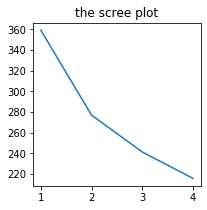

In [81]:
plt.figure(figsize=(3,3))
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,5):
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=10)
    kmeans.fit(data1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,5),wcss)
plt.title("the scree plot")
plt.show()